#### 생성의 무게와 크기로 생선 분류
- 데이터셋 : fish.csv
- 피쳐/입력 데이터 : Weight, Length
- 타겟/클래스/출력 : Species
- 기계학습 방법 : 지도학습 ==> 분류
- 분류 알고리즘(문제 해결 방법) : 미정

In [323]:
# [1] 데이터 살펴보기
# [1-1] 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt

In [324]:
# 경로 => 상대경로, 절대경로
# 상대경로 : 현재 파일을 기준으로 경로를 설정
# ./ : 현재 위치
# ../ : 상위 즉, 한 단계 위의 위치
Data_File = '../Data/fish.csv' # 상대경로

# 절대경로 : 드라이브(C, D, E, ...)를 기준으로 경로를 설정
Data_File2 = r'/Users/anhyojun/VSCode/K-Digital Training/김소현 강사님/Scikit-learn/Data/fish.csv'

In [325]:
# CSV ==> DataFrame으로 읽어오기
# - 첫번째 줄 : 컬럼명 존재
# - 구분자 : 쉼표
# - 로딩컬럼 : Species, Weight, Length 즉, 0, 1, 2
fish = pd.read_csv(Data_File, usecols = [0, 1, 2])
fish

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [326]:
# [1-2] 데이터 확인
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [327]:
# [1-3] 컬럼별 결측치 체크
# -> isnull() X
# -> 컬럼별 고유값 체크 ==> 개수
fish['Weight'].unique()

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        475. ,  600. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,
        680. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  150. ,  145. ,  160. ,  140. ,  169. ,  161. ,
        200. ,  180. ,  272. ,  270. ,  306. ,  540. ,  800. ,   55. ,
         60. ,   90. ,  170. ,  273. ,  300. ,    5.9,   32. ,   51.5,
         70. ,  100. ,   80. ,   85. ,  115. ,  125. ,  130. ,  135. ,
        225. ,  188. ,  197. ,  218. ,  260. ,  265. ,  250. ,  320. ,
        514. ,  556. ,  840. ,  690. ,  900. ,  820. , 1015. , 1100. ,
        345. ,  456. ,  510. ,  567. ,  770. , 1250. , 1600. , 1550. ,
       1650. ,    6.7,    7.5,    7. ,    9.7,    9.8,    8.7,   10. ,
          9.9,   12.2,   13.4,   19.7,   19.9])

In [328]:
fish['Length'].unique()

array([25.4, 26.3, 26.5, 29. , 29.7, 30. , 30.7, 31. , 31.5, 32. , 33. ,
       33.5, 34. , 34.5, 35. , 36. , 37. , 38.5, 39.5, 41. , 14.1, 18.2,
       18.8, 19.8, 20. , 20.5, 20.8, 21. , 22. , 22.5, 24. , 23.4, 23.5,
       25.2, 26. , 27. , 31.7, 28. , 36.4, 40. , 14.7, 15.5, 17.7, 19. ,
       20.7, 21.5, 23. , 25. ,  8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7,
       19.6, 21.3, 22.7, 24.6, 25.6, 27.3, 27.5, 28.7, 32.8, 36.5, 39. ,
       42. , 43. , 43.5, 44. , 32.3, 37.3, 38. , 42.5, 45. , 46. , 48. ,
       51.7, 56. , 60. , 63.4,  9.8, 10.5, 10.6, 11. , 11.2, 11.3, 11.8,
       12. , 12.2, 12.4, 13. , 14.3])

In [329]:
fish.describe()

,Weight,Length
count,159.000000,159.000000
mean,398.326415,28.415723
std,357.978317,10.716328
min,0.000000,8.400000
25%,120.000000,21.000000
50%,273.000000,27.300000
75%,650.000000,35.500000
max,1650.000000,63.400000


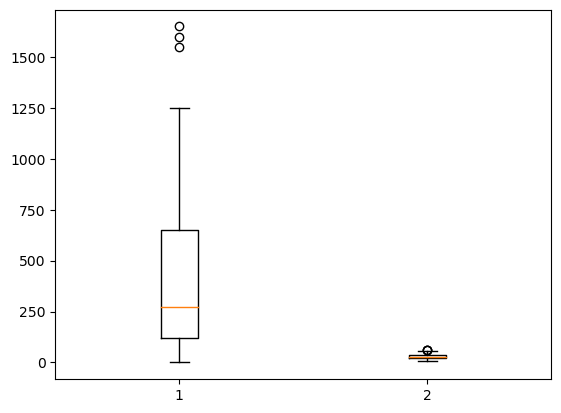

In [330]:
plt.boxplot(fish[['Weight', 'Length']])
plt.show()

In [331]:
# [1-4] 컬럼별 중복값 체크
# => 길이와 무게가 같다고 해서 높이, 너비, 대각선 길이가 같지 않다
# => 중복 데이터 유지

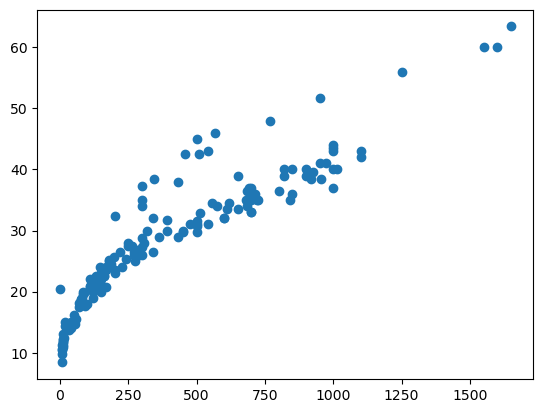

In [332]:
plt.scatter(fish['Weight'], fish['Length'])
plt.show()

In [333]:
# [2] 피쳐와 타겟의 관계, 피쳐와 피쳐의 관계
# [2-1] 피쳐와 타겟의 관계 ==> 어느정도의 연관성이 있는지 확인
# => 상관계수 확인
# => object 타입의 품종을 int로 변환
# =>
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [334]:
names = fish['Species'].unique().tolist()
values = {name : idx+1 for idx, name in enumerate(names)}    # 딕셔너리 컨프리헨션
# values = {'Bream' : 1, 'Roach' : 2, 'Whitefish' : 3, 'Parkki' : 4, 'Perch' : 5, 'Pike' : 6, 'Smelt' : 7}
fish['fish_code'] = fish['Species'].replace(values)

In [335]:
fish

,Species,Weight,Length,fish_code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1
...,...,...,...,...
154,Smelt,12.2,12.2,7
155,Smelt,13.4,12.4,7
156,Smelt,12.2,13.0,7
157,Smelt,19.7,14.3,7


In [336]:
mask = (fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')
two_fish = fish[mask]
two_fish.corr(numeric_only=True)

,Weight,Length,fish_code
Weight,1.000000,0.960347,-0.843828
Length,0.960347,1.000000,-0.944132
fish_code,-0.843828,-0.944132,1.000000


In [337]:
fish_code_list = []

for i in fish['Species']:
    for j in range(len(fish['Species'].unique())):
        if i == fish['Species'].unique()[j]:
            fish_code_list.append(j + 1)

pd.value_counts(fish_code_list)

5    56
1    35
2    20
6    17
7    14
4    11
3     6
Name: count, dtype: int64

In [338]:
fish['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

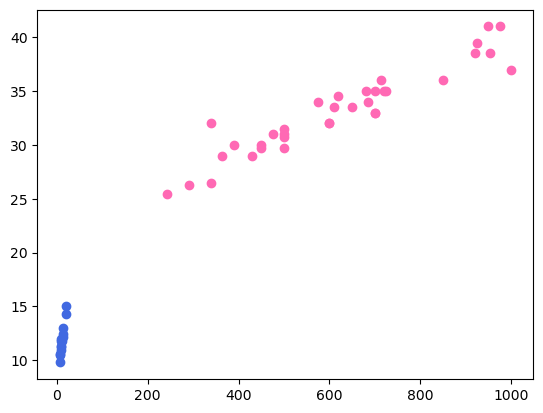

In [339]:
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개 피쳐 Weight, Length로 Bream, Smelt 분류 가능함
plt.scatter(two_fish[two_fish['Species'] == 'Bream']['Weight'],
            two_fish[two_fish['Species'] == 'Bream']['Length'], color = 'hotpink')
plt.scatter(two_fish[two_fish['Species'] == 'Smelt']['Weight'],
            two_fish[two_fish['Species'] == 'Smelt']['Length'], color = 'royalblue')
plt.show()

[3] 학습/훈련 진행
- 지도학습 ==> 분류
- ML프레임워크 ==> scikit-learn
- 학습 알고리즘 ==> 최근접 이웃 알고리즘 즉, KNN

In [340]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [341]:
# [1] 학습 인스턴스 생성 ==> 클래스명(매개변수 값)
model = KNeighborsClassifier(n_neighbors=5)

In [342]:
print(model, model.n_neighbors) # ERROR model.classes_

KNeighborsClassifier() 5


In [343]:
# [2] 학습/훈련 진행
# model.fit(피쳐2D, 타겟1D)
features = two_fish[['Weight', 'Length']]
target = two_fish['fish_code']
print(f'features.shape : {features.shape}, {features.ndim}D')
print(f'target.shape   : {target.shape}, {target.ndim}D')

features.shape : (49, 2), 2D
target.shape   : (49,), 1D


In [344]:
import numpy as np

In [345]:
a = [1, 10, 2, 20, 3, 30, 4, 40, 5, 50, 6, 60]
a = [[a[2*i], a[2*i+1]]for i in range(6)]
a

[[1, 10], [2, 20], [3, 30], [4, 40], [5, 50], [6, 60]]

In [346]:
model.fit(features, target)

KNeighborsClassifier()

In [347]:
# 모델 파라미터(Model Parameter) : 학습 후 설정되는 속성
# - 파라미터 이름 : XXX_
print(model.classes_, model.feature_names_in_)

[1 7] ['Weight' 'Length']


[4] 검증
- KNN은 모델 즉 규칙 및 패턴이 생성 X
- 검증 데이터가 입력이 되면 학습 데이터와 거리 측정
- 지정된 k 개수 만큼 검증 데이터와 가까운 데이터를 도출
- 분류일 경우 k 개수 데이터가 가진 라벨/타겟/클래스에 따라 다수결로 결정

In [348]:
two_fish.head()

,Species,Weight,Length,fish_code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1


In [349]:
# 검증 데이터와 타겟
data = two_fish.loc[:4, ['Weight', 'Length']]
target = two_fish.loc[:4, 'fish_code']

In [350]:
data.shape

(5, 2)

In [351]:
array_data = np.reshape(data, (1,-1))

In [352]:
array_data

array([[242. ,  25.4, 290. ,  26.3, 340. ,  26.5, 363. ,  29. , 430. ,
         29. ]])

In [353]:
# 새로운 데이터에 대해서 결과를 예측
#  model.predict(2D) ==> 1D
predict_target = model.predict(data)
predict_target

array([1, 1, 1, 1, 1])

In [354]:
data

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [355]:
target == predict_target

0    True
1    True
2    True
3    True
4    True
Name: fish_code, dtype: bool

In [356]:
model.score(data, target)

1.0

In [357]:
# 예측결과와 정답을 비교해서 점수를 도출
# model.score(2D피쳐, 1타겟)
# 결과 : 0.0 ~ 1.0
model.score(data, target)

1.0